<a href="https://colab.research.google.com/github/MentalTorque/Federal-Spending/blob/main/Staich_Project_2_Part_4.3(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Nicholas M. Staich

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2) Brief description of data

Spending by federal agency by statre and office.

3) What is the target?

Send by org

4) Is this a classification or regression problem?

* Classification


5) How many features?

* 5

6) How many rows of data.

* 6,557

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

* Properly structuring the data on this one is my major concern.  I am interested to see what I can do with this data.

#Project 2 - Part 2 (Core)

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.)

Note that you should start working on your in depth EDA and making multivariate visuals for the upcoming part 3 of this assignment once you have submitted all tasks and your belt exam for this stack.

Commit your file to your Github repository and submit the link below.


In [2]:
#Load my Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

from seaborn import heatmap
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn import metrics
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout



## Federal Spending Data Set



In [3]:
#Grab the data
data_source_2 = ('/content/drive/MyDrive/Coding Dojo/Data USA Cart.csv')

df = pd.read_csv(data_source_2)
df.head()

,ID Geography,Geography,ID Agency,Agency,Obligation Amount (2017)
0,04000US11,District of Columbia,1100,Executive Office of the President,63125124.30
1,04000US17,Illinois,1100,Executive Office of the President,436400.70
2,04000US36,New York,1100,Executive Office of the President,-25400.44
3,04000US51,Virginia,1100,Executive Office of the President,114026.54
4,04000US04,Arizona,1127,Office of the National Drug Control Policy,9700578.94


In [4]:
#Check data shape
df.shape

(6557, 5)

Data set is 6557 observations across 5 features

In [5]:
# Understand the characteristics of the dataframe we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Geography              6557 non-null   object 
 1   Geography                 6557 non-null   object 
 2   ID Agency                 6557 non-null   object 
 3   Agency                    6557 non-null   object 
 4   Obligation Amount (2017)  6557 non-null   float64
dtypes: float64(1), object(4)
memory usage: 256.3+ KB


In [6]:
# Verify the stypes we are working with
df.dtypes

ID Geography                 object
Geography                    object
ID Agency                    object
Agency                       object
Obligation Amount (2017)    float64
dtype: object

Objects are going to have to be encoded for a regression problem on the continuous observation value.

In [7]:
#Check for missing values 
df.value_counts().isna()

ID Geography  Geography       ID Agency  Agency                                                         Obligation Amount (2017)
04000US01     Alabama         1145       Peace Corps                                                    3.819297e+04                False
04000US37     North Carolina  7530       Centers for Medicare and Medicaid Services                     1.216213e+09                False
                              8635       Assistant Secretary for Public and Indian Housing              3.616013e+08                False
                              8630       Assistant Secretary for Housing--Federal Housing Commissioner  1.332609e+08                False
                              8620       Assistant Secretary for Community Planning and Development     2.930580e+08                False
                                                                                                                                    ...  
04000US20     Kansas          5940       Na

In [8]:
#Check the object columns the will have to be OHE to make sure all values are unique and correct.

df_obj = df.select_dtypes(include = 'object')
df_obj_cols = list(df_obj)
for col in df_obj_cols:
  print(f"col: {df_obj[col].unique()}\n")


col: ['04000US11' '04000US17' '04000US36' '04000US51' '04000US04' '04000US06'
 '04000US08' '04000US10' '04000US12' '04000US15' '04000US18' '04000US24'
 '04000US27' '04000US29' '04000US30' '04000US31' '04000US34' '04000US35'
 '04000US39' '04000US42' '04000US47' '04000US48' '04000US49' '04000US53'
 '04000US55' '04000US01' '04000US13' '04000US19' '04000US20' '04000US22'
 '04000US26' '04000US37' '04000US41' '04000US50' '04000US09' '04000US16'
 '04000US23' '04000US25' '04000US45' '04000US02' '04000US05' '04000US21'
 '04000US32' '04000US33' '04000US40' '04000US54' '04000US56' '04000US28'
 '04000US38' '04000US44' '04000US46' '04000US72']

col: ['District of Columbia' 'Illinois' 'New York' 'Virginia' 'Arizona'
 'California' 'Colorado' 'Delaware' 'Florida' 'Hawaii' 'Indiana'
 'Maryland' 'Minnesota' 'Missouri' 'Montana' 'Nebraska' 'New Jersey'
 'New Mexico' 'Ohio' 'Pennsylvania' 'Tennessee' 'Texas' 'Utah'
 'Washington' 'Wisconsin' 'Alabama' 'Georgia' 'Iowa' 'Kansas' 'Louisiana'
 'Michigan' 'Nort

This is going to create a ery wide data set once One Hot Encoded.

In [9]:
#Rename the 'Obligation Amount (2017)' feature to the more palatable 'Obligation'
df.rename({'Obligation Amount (2017)':'Obligation'}, axis='columns', inplace=True)
df.head()

,ID Geography,Geography,ID Agency,Agency,Obligation
0,04000US11,District of Columbia,1100,Executive Office of the President,63125124.30
1,04000US17,Illinois,1100,Executive Office of the President,436400.70
2,04000US36,New York,1100,Executive Office of the President,-25400.44
3,04000US51,Virginia,1100,Executive Office of the President,114026.54
4,04000US04,Arizona,1127,Office of the National Drug Control Policy,9700578.94


In [11]:
#Look into the unique values of the features:
df_obj = df.select_dtypes(include = 'object')
df_obj.drop(columns = ['ID Geography', 'ID Agency'], inplace=True)
df_obj_cols = list(df_obj)
for col in df_obj_cols:
  print(f"col: {df_obj[col].unique()}\n")


col: ['District of Columbia' 'Illinois' 'New York' 'Virginia' 'Arizona'
 'California' 'Colorado' 'Delaware' 'Florida' 'Hawaii' 'Indiana'
 'Maryland' 'Minnesota' 'Missouri' 'Montana' 'Nebraska' 'New Jersey'
 'New Mexico' 'Ohio' 'Pennsylvania' 'Tennessee' 'Texas' 'Utah'
 'Washington' 'Wisconsin' 'Alabama' 'Georgia' 'Iowa' 'Kansas' 'Louisiana'
 'Michigan' 'North Carolina' 'Oregon' 'Vermont' 'Connecticut' 'Idaho'
 'Maine' 'Massachusetts' 'South Carolina' 'Alaska' 'Arkansas' 'Kentucky'
 'Nevada' 'New Hampshire' 'Oklahoma' 'West Virginia' 'Wyoming'
 'Mississippi' 'North Dakota' 'Rhode Island' 'South Dakota' 'Puerto Rico']

col: ['Executive Office of the President'
 'Office of the National Drug Control Policy' 'Peace Corps'
 'United States Trade and Development Agency'
 'Office of Inspector General' 'Office of the Chief Financial Officer'
 'Forest Service' 'Natural Resources Conservation Service'
 'Farm Service Agency' 'Foreign Agricultural Service'
 'Risk Management Agency' 'Rural Utilities 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


This is not a very effective method across the 200+ agencies listed.

In [12]:
df.columns

Index(['ID Geography', 'Geography', 'ID Agency', 'Agency', 'Obligation'], dtype='object')

In [13]:
#Drop the ID columns as they are redundant
df.drop(columns = ['ID Geography', 'ID Agency'], inplace=True)

In [14]:
#Verify that the column dropped 
df.columns

Index(['Geography', 'Agency', 'Obligation'], dtype='object')

In [15]:
#Check for missing data...it's never easy.
print('Missing data:\n', df.isna().sum())
print('\n')


Missing data:
 Geography     0
Agency        0
Obligation    0
dtype: int64




In [16]:
# Drop Duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
# Set the decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Obligation'].value_counts().isna()

0.00000            False
250000.00000       False
6000.00000         False
15000.00000        False
10000.00000        False
                   ...  
2243315.28000      False
104824579.09000    False
27748.87000        False
845483.87000       False
207102.18000       False
Name: Obligation, Length: 6321, dtype: bool

In [18]:
# CHeck Info, Shape, and types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557 entries, 0 to 6556
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geography   6557 non-null   object 
 1   Agency      6557 non-null   object 
 2   Obligation  6557 non-null   float64
dtypes: float64(1), object(2)
memory usage: 204.9+ KB


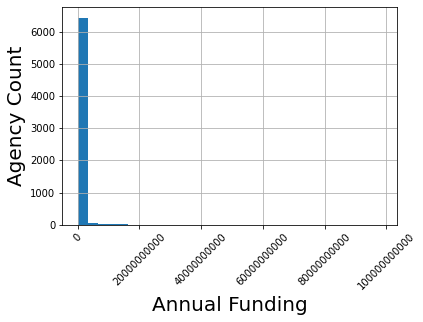

In [20]:
# Distribution of Agency Count by Funding Amount
df['Obligation'].hist(bins = 30)
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

Distribution of Agency Count by Funding Amount

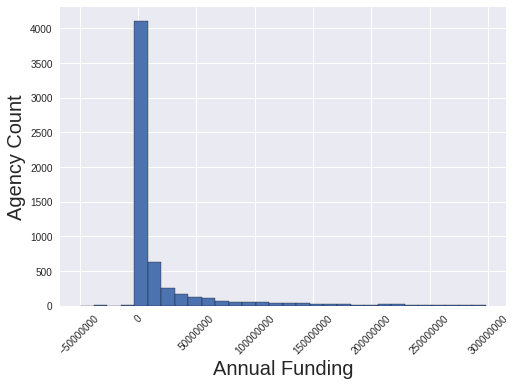

In [21]:
# Adding seaborn style 
plt.style.use('seaborn')
fund_filter = df.loc[:, 'Obligation'] <= 300000000
df.loc[fund_filter, 'Obligation'].hist(bins = 30,
                                   edgecolor='black')
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

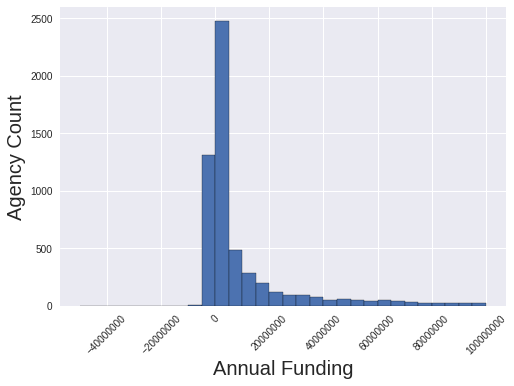

In [22]:
# Adding seaborn style 
plt.style.use('seaborn')
fund_filter = df.loc[:, 'Obligation'] <= 100000000
df.loc[fund_filter, 'Obligation'].hist(bins = 30,
                                   edgecolor='black')
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

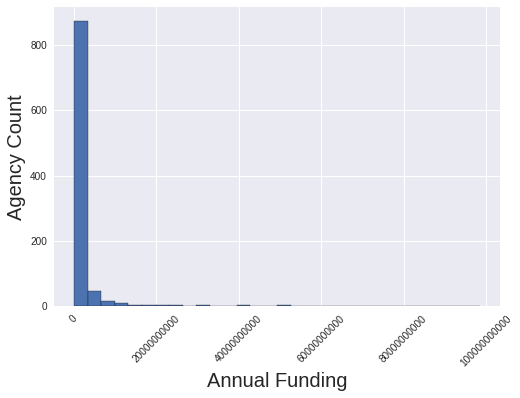

In [23]:
# Adding seaborn style 
plt.style.use('seaborn')
fund_filter = df.loc[:, 'Obligation'] >= 100000000
df.loc[fund_filter, 'Obligation'].hist(bins = 30,
                                   edgecolor='black')
plt.xlabel('Annual Funding', fontsize = 20);
plt.xticks(rotation = 45)
plt.ylabel('Agency Count', fontsize = 20);
plt.ticklabel_format(useOffset=False, style='plain')

In [24]:
fundFilter = df['Obligation'] >= 0
#numpy set_printoptions(suppress=True)
top20Agency = df.loc[fundFilter, :].groupby(['Agency'])['Obligation'].mean().sort_values(ascending = False).head(20).round(2)

print(top20Agency)

Agency
Centers for Medicare and Medicaid Services                      14326368065.23000
Social Security Administration                                  11660633598.55000
Department of the Navy                                           1812651875.85000
Under Secretary for Benefits/Veterans Benefits Administration    1488336040.04000
Department of the Army                                           1205472186.82000
Department of the Air Force                                      1014655699.62000
Under Secretary for Health/Veterans Health Administration         970837320.87000
Department of Education                                           760376474.45000
Federal Highway Administration                                    715068970.59000
Department of Energy                                              550264129.00000
Defense Logistics Agency                                          524099111.54000
National Institutes of Health                                     511416479.91000
Departmen

In [143]:
fundFilter = df['Obligation'] >= 0
#numpy set_printoptions(suppress=True)
top20Agency = df.loc[fundFilter, :].groupby(['Agency'])['Obligation'].sum().sort_values(ascending = False).head(20).round(2)

print(top20Agency)

Agency
Centers for Medicare and Medicaid Services                      687665667131.05005
Social Security Administration                                  606352947124.80005
Department of the Navy                                           92445245668.16000
Under Secretary for Benefits/Veterans Benefits Administration    77393474082.00000
Department of the Army                                           62684553714.48000
Department of the Air Force                                      52762096380.28000
Under Secretary for Health/Veterans Health Administration        50483540685.00000
Department of Education                                          39539576671.30000
Federal Highway Administration                                   37183586470.43000
Department of Energy                                             27513206449.87000
Defense Logistics Agency                                         27253153800.05000
National Institutes of Health                                    26593656955.340

In [144]:
df['Obligation'].sum()

2040479396498.9731

In [25]:
#Set your target and data sets

#Set Target
y = df['Obligation']

#Remove target from dataset
X = df.drop(columns = 'Obligation')

In [26]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Instantiate the categorical and numeric column selectors to select appropriate columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Instantiate the Standard Scaler and the One hot encoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [28]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [29]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [30]:
# Make tuples for preprocessing the categorical and numeric columns
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f717db1e750>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f717db25ed0>)])

In [31]:
#Instantiate and utilize column transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [32]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f717db1e750>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f717db25ed0>)])

In [33]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [34]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (4917, 251)




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [36]:
X_test_df = pd.DataFrame(X_test_processed)
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [37]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Columns: 251 entries, 0 to 250
dtypes: float64(251)
memory usage: 9.4 MB


##Modeling:

### Model 1:

In [38]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_processed.shape[1]
input_shape

251

In [39]:
# Select the model type to use, in this case I'll us a Sequential model
model1 = Sequential()

In [40]:
#Setup our Hidden Layers:

#Adding first hidden layer:
model1.add(Dense(251, 
                input_dim = input_shape,
                activation = 'relu')) 

#Only using 1 hidden layer initially.
model1.add(Dense(10, activation='relu'))
# Output layer
model1.add(Dense(1, activation = 'linear'))

# I chose the linear activation function because this is using the obligation, .

In [41]:
#Compile Model
model1.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])
                           

In [42]:
history =model1.fit(X_train_processed, y_train,
                        validation_data = (X_test_processed, y_test),
                        epochs=100,
                        verbose=0)

In [43]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

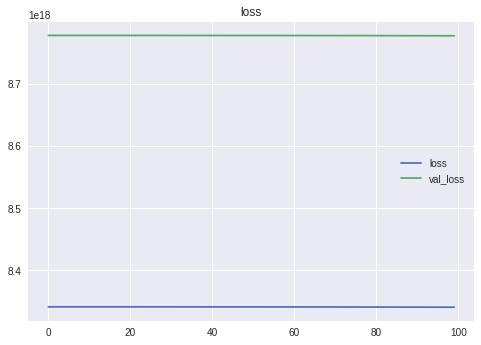

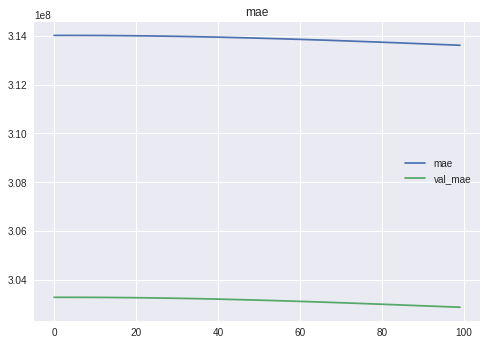

In [44]:
# plot learning
 
plot_history(history)

In [45]:
'''import seaborn as sns
corr = X_train_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)'''

"import seaborn as sns\ncorr = X_train_df.corr()\nsns.heatmap(corr, cmap = 'Blues', annot = True)"

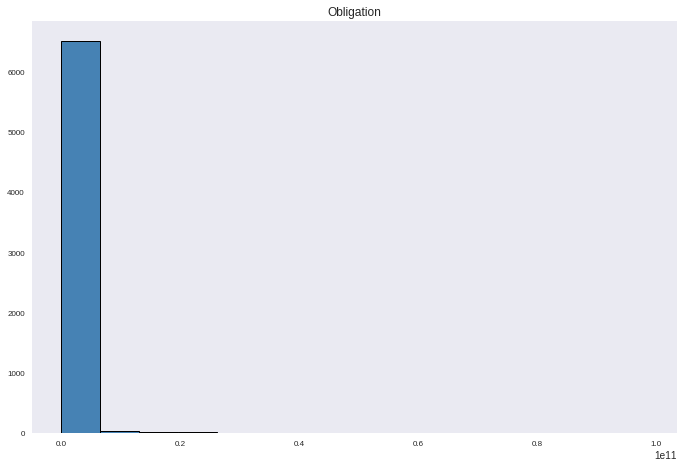

In [46]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [47]:
 #Instantiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_train_processed)

In [48]:
exp_var_pca = pca.explained_variance_ratio_ 

In [49]:
exp_var_pca

array([0.01409886, 0.01356028])

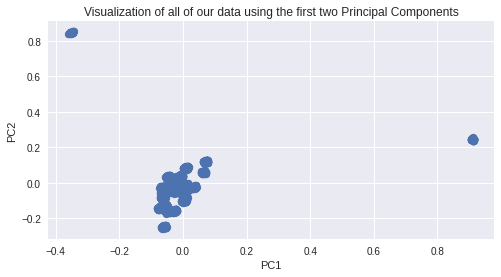

In [50]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1])
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

#Project 2 - Part 3 (Core)

Link to Video

Project 2 - Part 3 (Core)


For this part of the project, create a 5-10  min video presentation with slide show that is designed for a TECHNICAL audience that addresses your data preparation and exploratory analysis for your selected data set. 

This is a chance for you to articulate what you have been working on, the decisions you have made, and the challenges you may have encountered.

Keep in mind that the information you share with a technical audience or a non-technical audience will be quite different, so it is important to differentiate between the two.  

Since this is a TECHNICAL audience, you may share code snippets and discuss the cleaning steps. For your final presentation, however, your audience will be non-technical and you will not include this type of information.  

To include in your presentation:

* Intro and background about your data set
* Explanation of the cleaning steps required and a brief explanation of how you addressed them in your data set.
* If there were null values, explain how you addressed them.
At least two exploratory visuals you used to understand your data set and what you learned from each.
* If relevant, any unique challenges you encountered while working with this data set and how you handled them.  

Commit your slide deck and video to your GitHub repository. 
Update your readme with a paragraph describing your data, data source, and any important or creative steps you took to prepare it for modeling.

Large files can be saved on Google Drive and the link can be added to GitHub. Ensure that the share settings allow anyone with the link to view the file.

Please submit the link to your GitHub Repository.

#Project 2- Part 4 (Core)


You are now entering into the model development phase of the project!

* Ensure that you complete the appropriate pre-processing steps
* Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model)
* Evaluate model performance with appropriate metrics for the model
* Choose your "production" model and justify this decision
* Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!)
* Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.

Commit your code to GitHub

Submit the link to your GitHub repository.

In [51]:
# transform train and test
X_train_proc2 = preprocessor.transform(X_train)
X_test_proc2 = preprocessor.transform(X_test)

In [52]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

#Model 1

In [53]:
# create model architecture
input_dim = X_train_proc2.shape[1]
 
reg_model1 = Sequential()
reg_model1.add(Dense(251, input_dim=input_dim, activation='relu'))
#reg_model1.add(Dense(150, activation='relu'))
reg_model1.add(Dense(1, activation='linear'))
 
reg_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 251)               63252     
                                                                 
 dense_4 (Dense)             (None, 1)                 252       
                                                                 
Total params: 63,504
Trainable params: 63,504
Non-trainable params: 0
_________________________________________________________________


In [54]:
# compile model with additional metrics
 
reg_model1.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae',metrics.RootMeanSquaredError()]                  ) 

In [55]:
# Generaate the history log
history = reg_model1.fit(X_train_proc2, y_train,
                        validation_data = (X_test_proc2, y_test),
                        epochs=100,
                       )


Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 8341590649413304320.0000 - mae: 314016640.0000 - root_mean_squared_error: 2888181248.0000 - val_loss: 8777832333093896192.0000 - val_mae: 303276768.0000 - val_root_mean_squared_error: 2962740736.0000
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 8341592298680745984.0000 - mae: 314016640.0000 - root_mean_squared_error: 2888181504.0000 - val_loss: 8777832333093896192.0000 - val_mae: 303276768.0000 - val_root_mean_squared_error: 2962740736.0000
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 8341593398192373760.0000 - mae: 314016448.0000 - root_mean_squared_error: 2888181504.0000 - val_loss: 8777832333093896192.0000 - val_mae: 303276736.0000 - val_root_mean_squared_error: 2962740736.0000
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 8341591748924932096.0000 - mae: 314016512.0000 - root_mean_squared_error: 2888181248.0000 - val_loss

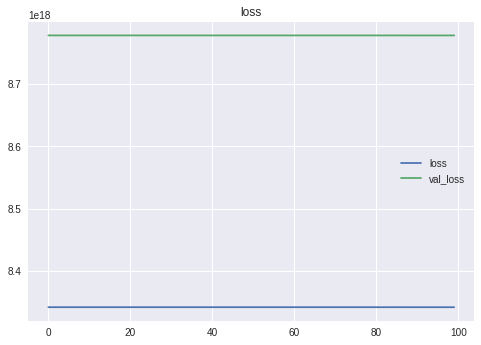

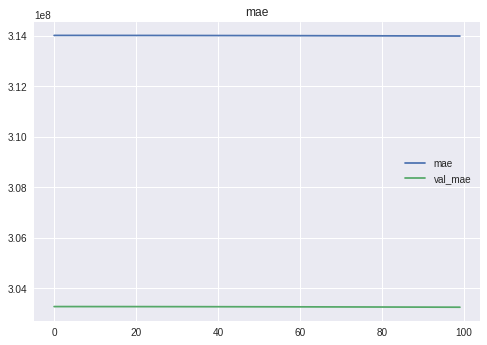

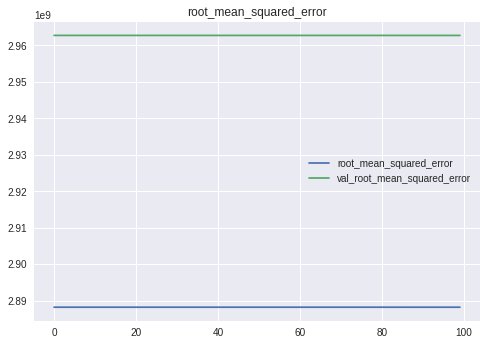

In [56]:
# plot learning
 
plot_history(history)

In [57]:
# evaluate model
 
y_pred = model1.predict(X_test_proc2)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 2962637015.4060493
final MAE: 302870614.33336484
final R2: -0.010513485042147552


# Model 2

In [58]:
# create model architecture
input_dim = X_train_proc2.shape[1]
 
reg_model2 = Sequential()
reg_model2.add(Dense(251, input_dim=input_dim, activation='relu'))
#reg_model2.add(Dense(150, activation='relu'))
reg_model2.add(Dense(1, activation='linear'))
 
reg_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 251)               63252     
                                                                 
 dense_6 (Dense)             (None, 1)                 252       
                                                                 
Total params: 63,504
Trainable params: 63,504
Non-trainable params: 0
_________________________________________________________________


In [59]:
# create model architecture
input_dim = X_train_proc2.shape[1]
 
reg_model2 = Sequential()
 
reg_model2.add(Dense(251, input_dim=input_dim, activation='relu'))
reg_model2.add(Dense(150, activation='relu'))
reg_model2.add(Dense(1, activation='linear'))
 
reg_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 251)               63252     
                                                                 
 dense_8 (Dense)             (None, 150)               37800     
                                                                 
 dense_9 (Dense)             (None, 1)                 151       
                                                                 
Total params: 101,203
Trainable params: 101,203
Non-trainable params: 0
_________________________________________________________________


In [60]:
# compile model with additional metrics
 
reg_model2.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae',metrics.RootMeanSquaredError()])   

In [61]:
# Generaate the history log
history = reg_model2.fit(X_train_proc2, y_train,
                        validation_data = (X_test_proc2, y_test),
                        epochs=100,
                        )


Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 8341594497704001536.0000 - mae: 314016512.0000 - root_mean_squared_error: 2888181760.0000 - val_loss: 8777832333093896192.0000 - val_mae: 303276736.0000 - val_root_mean_squared_error: 2962740736.0000
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 8341593398192373760.0000 - mae: 314016032.0000 - root_mean_squared_error: 2888181504.0000 - val_loss: 8777831233582268416.0000 - val_mae: 303275968.0000 - val_root_mean_squared_error: 2962740480.0000
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 8341592298680745984.0000 - mae: 314014784.0000 - root_mean_squared_error: 2888181504.0000 - val_loss: 8777829584314826752.0000 - val_mae: 303273888.0000 - val_root_mean_squared_error: 2962740224.0000
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 8341587900634234880.0000 - mae: 314011712.0000 - root_mean_squared_error: 2888180736.0000 - val_loss

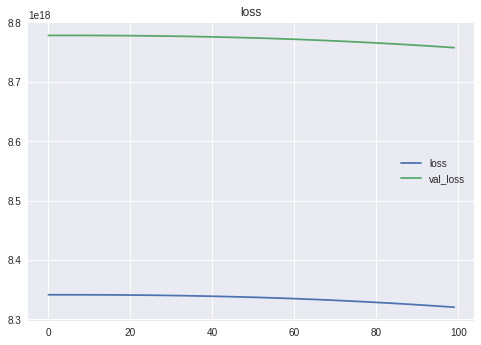

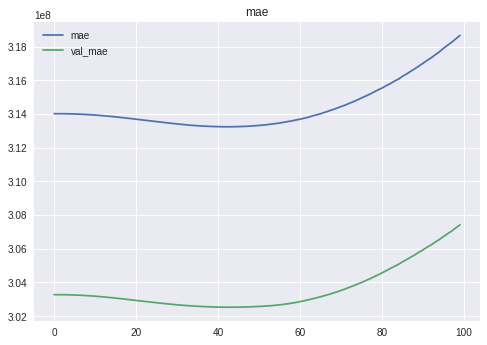

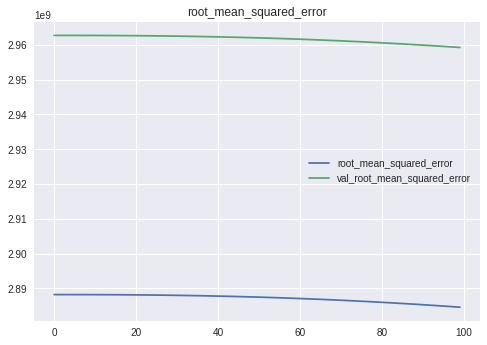

In [62]:
# plot learning
 
plot_history(history)

In [63]:
# evaluate model
 
y_pred = model1.predict(X_test_proc2)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 2962637015.4060493
final MAE: 302870614.33336484
final R2: -0.010513485042147552


# Model 3

In [138]:

# create model architecture
input_dim = X_train_proc2.shape[1]
 
reg_model3 = Sequential()
 
reg_model3.add(Dense(251, input_dim=input_dim, activation='relu'))

#reg_model3.add(Dropout(.5))
kernel_regularizer=keras.regularizers.l2(0.001)
reg_model3.add(Dense(300, activation='sigmoid'))

early_stopping = EarlyStopping(patience = 5)
kernel_regularizer=keras.regularizers.l2(0.0001)
reg_model3.add(Dense(250, activation='sigmoid'))

reg_model3.add(Dropout(.5))
early_stopping = EarlyStopping(patience = 5)
kernel_regularizer=keras.regularizers.l2(0.0001)
reg_model3.add(Dense(200, activation='relu'))

reg_model3.add(Dropout(.5))
kernel_regularizer=keras.regularizers.l2(0.0001)
reg_model3.add(Dense(50, activation='relu'))

#reg_model3.add(Dropout(.5))
kernel_regularizer=keras.regularizers.l2(0.0001)
reg_model3.add(Dense(25, activation='relu'))

reg_model3.add(Dense(1, activation='linear'))
 
reg_model3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 251)               63252     
                                                                 
 dense_135 (Dense)           (None, 300)               75600     
                                                                 
 dense_136 (Dense)           (None, 250)               75250     
                                                                 
 dropout_30 (Dropout)        (None, 250)               0         
                                                                 
 dense_137 (Dense)           (None, 200)               50200     
                                                                 
 dropout_31 (Dropout)        (None, 200)               0         
                                                                 
 dense_138 (Dense)           (None, 50)              

In [139]:
# compile model with additional metrics
 
reg_model3.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae',metrics.RootMeanSquaredError()])  

In [140]:
# Generaate the history log
history = reg_model3.fit(X_train_proc2, y_train,
                        validation_data = (X_test_proc2, y_test),
                        epochs=80,
                        )

Epoch 1/80
154/154 [==============================] - 1s 5ms/step - loss: 8341591748924932096.0000 - mae: 314014816.0000 - root_mean_squared_error: 2888181248.0000 - val_loss: 8777824086756687872.0000 - val_mae: 303267296.0000 - val_root_mean_squared_error: 2962739200.0000
Epoch 2/80
154/154 [==============================] - 1s 4ms/step - loss: 8341539522122612736.0000 - mae: 313961856.0000 - root_mean_squared_error: 2888172288.0000 - val_loss: 8777686647803215872.0000 - val_mae: 303135776.0000 - val_root_mean_squared_error: 2962716160.0000
Epoch 3/80
154/154 [==============================] - 1s 4ms/step - loss: 8341183280355213312.0000 - mae: 313756960.0000 - root_mean_squared_error: 2888110592.0000 - val_loss: 8777068172512591872.0000 - val_mae: 302871776.0000 - val_root_mean_squared_error: 2962611712.0000
Epoch 4/80
154/154 [==============================] - 1s 5ms/step - loss: 8340175577948356608.0000 - mae: 313558656.0000 - root_mean_squared_error: 2887936256.0000 - val_loss: 87

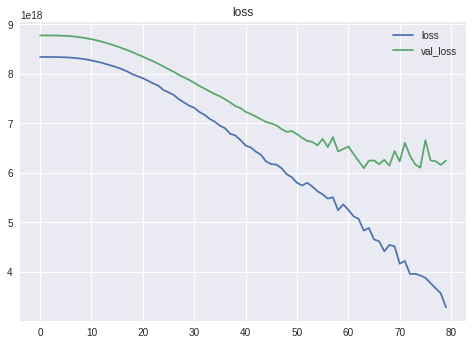

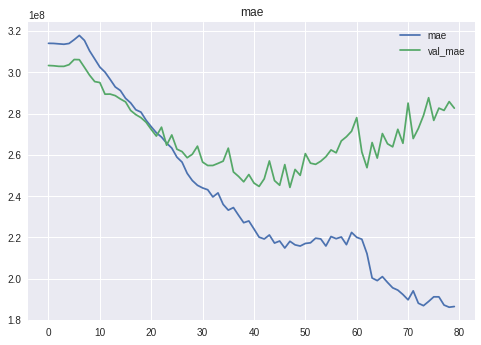

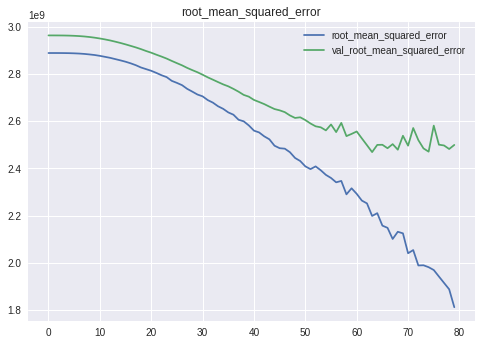

In [141]:
# plot learning
 
plot_history(history)

In [142]:
# evaluate model
 
y_pred = reg_model3.predict(X_test_proc2)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 2499062835.959598
final MAE: 282615772.00248593
final R2: 0.2809823085896217


Model 3 is presently the most accurate model, though others can be generated to improve accuracy.  These will be investigated in the future as I continue to refine this project.